# Spectra of light sources
which were used in lens testing

Device: Motorola g8 Power smartphone

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import tifffile as tif
import glob, os
from pathlib import Path
import sys
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'lib'))
import optimization as opt # custom-made optimization library
from utils import * # custom utilities

In [2]:
dict_spectra = {}

In [4]:
datafolder = "D:\\benchtopData\\Lens-testing\\Spectra\\"
save_figs_folder = ".\\Motorola-g8-spectra-figs\\"
    
datafiles = {
    "phone_white": datafolder + "MyPhone-WhiteScreen.csv",
    "phone_blue": datafolder + "MyPhone-BlueScreen.csv",
    "phone_green": datafolder + "MyPhone-GreenScreen.csv",
    "phone_red": datafolder + "MyPhone-RedScreen.csv",
}

NAMES = {
    "phone_white": "white",
    "phone_blue": "RGB(0,0,255)",
    "phone_green": "RGB(0,255,0)",
    "phone_red": "RGB(255,0,0)",
}

COLORS = {
    "phone_white": "gray",
    "phone_blue": 'blue',
    "phone_green": "green",
    "phone_red": "red",
}

if not os.path.exists(save_figs_folder):
    print("Figs folder created")
    os.mkdir(save_figs_folder)

Figs folder created


In [5]:
for key in datafiles.keys():
    spectrum = np.genfromtxt(datafiles[key], delimiter=',', skip_header=1)
    dict_spectra[key] = spectrum

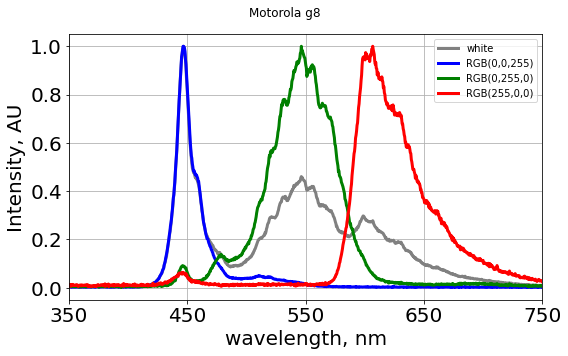

In [8]:
# plot the middle sections of Z-profile along Y axis (longest axis) and X (shortest)
fig = plt.figure(figsize=(8, 5))
fig_title = f"Motorola g8"
fig.suptitle(fig_title)
FONTSIZE_LABELS = FONTSIZE_TITLES = 20
wl_range = np.array((350, 750))
keys_exclude = []

ax0 = plt.subplot(1, 1, 1)
ax0.tick_params(axis='both', which='major', labelsize=FONTSIZE_LABELS)
for key in dict_spectra.keys():
    if key not in keys_exclude:
        profile = (dict_spectra[key][:,1] - dict_spectra[key][:,1].min())/(dict_spectra[key][:,1].max() - dict_spectra[key][:,1].min())
        ax0.plot(dict_spectra[key][:,0], profile, label=NAMES[key], color=COLORS[key], lw=3)
# ax0.set_ylim([0, y_range[-1]])
ax0.set_xlim(wl_range)
ax0.set_ylabel('Intensity, AU', fontsize=FONTSIZE_LABELS)
ax0.set_xlabel('wavelength, nm', fontsize=FONTSIZE_LABELS)
# ax0.set_yticks(np.round((0, y_range[-1]/4, y_range[-1]/2, y_range[-1]*3/4, y_range[-1]),2))
ax0.set_xticks(np.arange(wl_range[0], wl_range[1]+100, 100))
ax0.legend(loc='best')
ax0.grid(True)

fig.tight_layout()

In [9]:
fig.savefig(save_figs_folder + "Motorola-g8-spectra.png", dpi=200)